
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd

# to store the file
import json

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data

#Find the table
table = soup.find('table', class_ = 'table')

# Create an empty list
data_rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr', class_ = 'data-row'):
    row_data = [cell.text for cell in row.find_all('td')]
    
    #Add the row_data to the list of data_rows 
    data_rows.append(row_data)

# Print the extracted data
for row_data in data_rows:
    print(row_data)


['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

#List of the columns names
columns_names = ['id',  'terrestrial_date', 'sol',  'ls',  'month',  'min_temp',   'pressure']


#Create a pandas DataFrame
mars_temp_df = pd.DataFrame(data_rows, columns = columns_names)

In [7]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types for data analysis
#mars_temp_df['id'] = mars_temp_df['id'].astype(int)

# Use the to_datetime method to change the date time type
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])

mars_temp_df['sol'] = mars_temp_df['sol'].astype(int)

mars_temp_df['ls'] = mars_temp_df['ls'].astype(int)


mars_temp_df['month'] = mars_temp_df['month'].astype(int)

# Convert the 'min_temp' and 'pressure' columns to float
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype(float)
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype(float)

# Convert the float values to integers
#mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype(int)
#mars_temp_df['pressure'] = mars_temp_df['pressure'].astype(int)


In [10]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?


# Group the data by 'month' and count the number of unique 'id' values
monthly_counts = mars_temp_df.groupby('month')['id'].nunique().reset_index()

# Rename the columns for clarity
monthly_counts.columns = ['Month', 'Number of Unique IDs']

# Sort the result in ascending order by 'Month'
#monthly_counts = monthly_counts.sort_values(by='Month')


monthly_counts

,Month,Number of Unique IDs
0,1,174
1,2,178
2,3,192
3,4,194
4,5,149
5,6,147
6,7,142
7,8,141
8,9,134
9,10,112


In [12]:
# 2. How many Martian days' worth of data are there?

#Count the number of sol in the Data Frame
mars_temp_df['sol'].count()



1867

In [13]:
# 3. What is the average low temperature by month?

#Calculate the minimum temperature for each month
average_low_temperature_by_month= mars_temp_df.groupby([ "month" ]) .mean() ["min_temp"]

# Display the result
average_low_temperature_by_month



C:\Users\Owner\AppData\Local\Temp\ipykernel_27524\4030837021.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_low_temperature_by_month= mars_temp_df.groupby([ "month" ]) .mean() ["min_temp"]


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

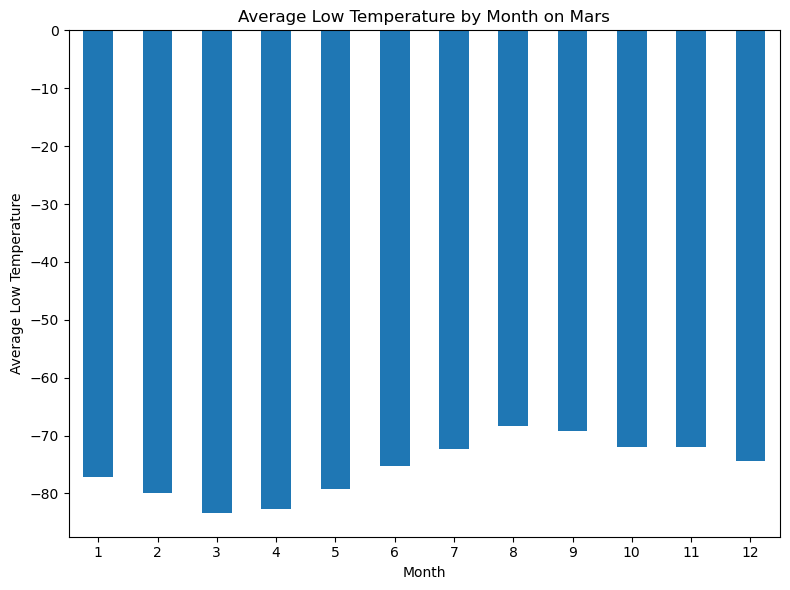

In [14]:
# Plot the average temperature by month


# Create a bar plot
plt.figure(figsize=(8, 6))
average_low_temperature_by_month.plot.bar()


# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month on Mars')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)


# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# Identify the coldest and hottest months in Curiosity's location

# Sort the DataFrame by min_temp in ascending order to find the coldest months
coldest_months = mars_temp_df.sort_values(by='min_temp')

# The coldest month is the first row
coldest_month = coldest_months.iloc[0]

# Sort the DataFrame by min_temp in descending order to find the hottest months
hottest_months = mars_temp_df.sort_values(by='min_temp', ascending=False)

# The hottest month is the first row
hottest_month = hottest_months.iloc[0]

#Display the results
print(f'The Coldest Month: {coldest_month["month"]} with a min_temp of {coldest_month["min_temp"]} °C')
print(f'Hottest Month: {hottest_month["month"]} with a min_temp of {hottest_month["min_temp"]} °C')

The Coldest Month: 3 with a min_temp of -90.0 °C
Hottest Month: 1 with a min_temp of -62.0 °C


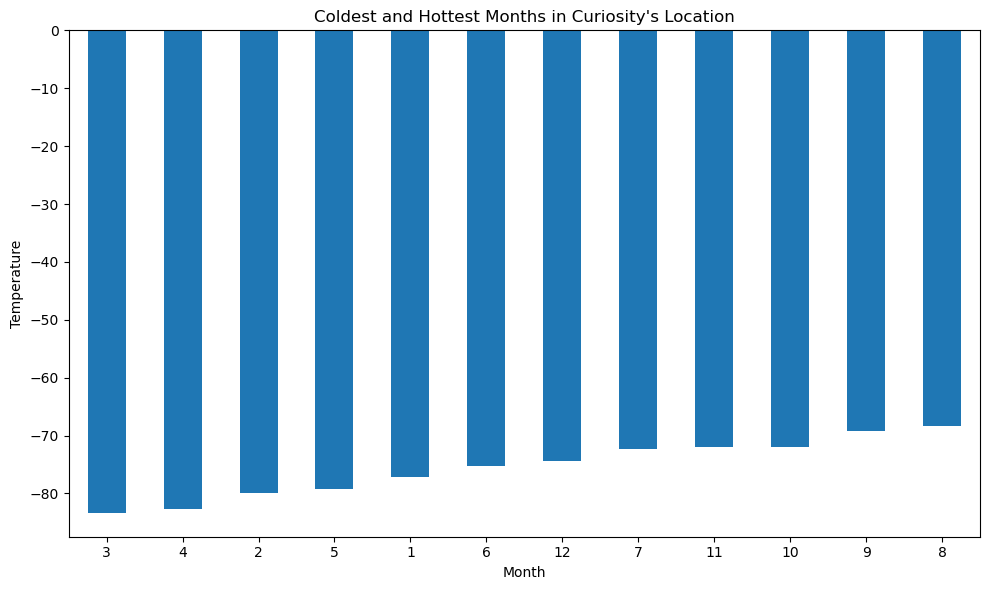

In [16]:
# Plot the coldest and hottest months in Curiosity's location

# Create a bar plot
plt.figure(figsize=(10, 6))
average_low_temperature_by_month.sort_values().plot.bar()


# Set labels and title
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title("Coldest and Hottest Months in Curiosity's Location")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)


# Show the plot
plt.tight_layout()
plt.show()

In [17]:
# 4. Average pressure by Martian month

# Group the DataFrame by month and calculate the mean pressure
average_pressure_by_month = mars_temp_df.groupby('month')['pressure'].mean()

# Print the resulting DataFrame
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

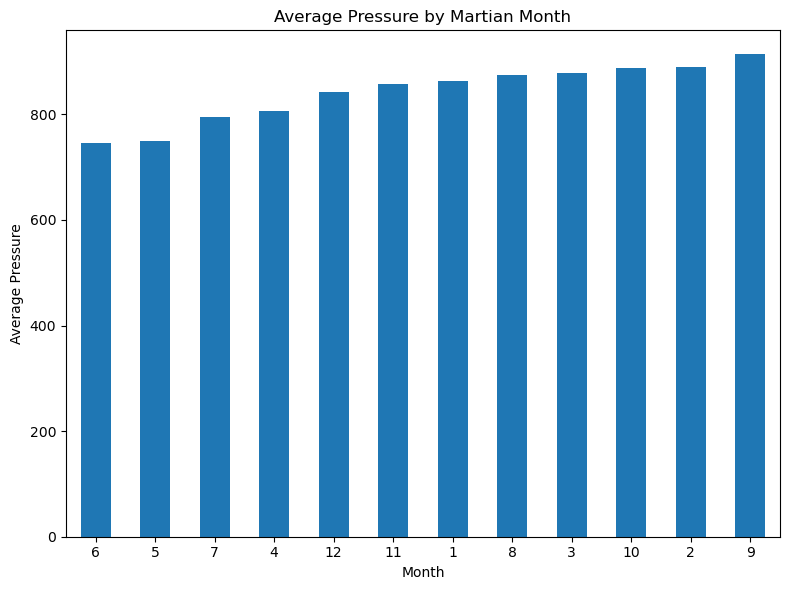

In [23]:
# Plot the average pressure by month


# Create a bar plot
plt.figure(figsize=(8, 6))
average_pressure_by_month.sort_values().plot.bar()


# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Martian Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [24]:
# 5. How many terrestrial (earth) days are there in a Martian year?


# Number of Martian days in a year
martian_days_per_year = 687

# Number of hours in a Martian day
# Approximately 24 hours, 37 minutes, and 23 seconds
hours_per_martian_day = 24.6229  

# Number of hours in a terrestrial (Earth) day
hours_per_earth_day = 24

# Calculate the number of terrestrial days in a Martian year
earth_days_per_martian_year = martian_days_per_year * hours_per_martian_day / hours_per_earth_day
print(f"There are approximately {earth_days_per_martian_year} terrestrial days in a Martian year.")

There are approximately 704.8305125 terrestrial days in a Martian year.


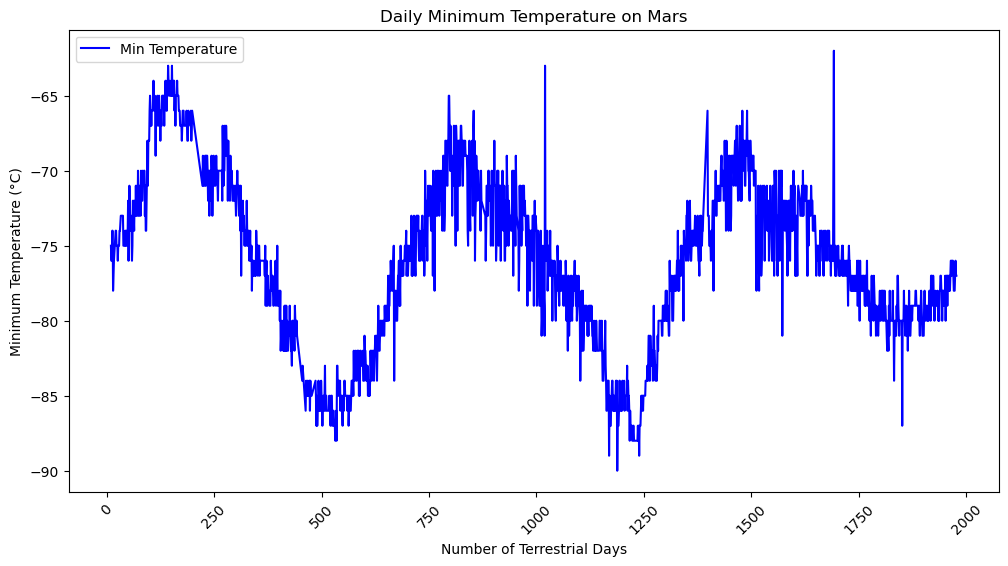

In [25]:


# Create a line plot of daily minimum temperatures
plt.figure(figsize=(12, 6))
plt.plot(mars_temp_df['sol'], mars_temp_df['min_temp'], label='Min Temperature', color='blue')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.xticks(rotation=45)



# Display the plot
plt.legend()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV

# Specify the file path where you want to save the CSV file
csv_file_path = "scraped_mars_temperature_data.csv"

# Use the to_csv method to write the DataFrame to a CSV file
mars_temp_df.to_csv(csv_file_path, index=False)

# Print a message to confirm the file has been saved
print(f"Data has been saved to {csv_file_path}")

Data has been saved to scraped_mars_temperature_data.csv


In [27]:
browser.quit()